In [22]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [23]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [24]:
# Vemos la forma
df.shape

(240000, 22)

In [25]:
df.columns

Index([u'titulo', u'descripcion', u'tipodepropiedad', u'direccion', u'ciudad',
       u'provincia', u'antiguedad', u'habitaciones', u'garages', u'banos',
       u'metroscubiertos', u'metrostotales', u'idzona', u'lat', u'lng',
       u'fecha', u'gimnasio', u'usosmultiples', u'piscina',
       u'escuelascercanas', u'centroscomercialescercanos', u'precio'],
      dtype='object')

In [26]:
df.head(1)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,...,23533.0,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0


vemos los valores más comunes de varias columnas

In [27]:
df.tipodepropiedad.value_counts().head()

Casa                  141717
Apartamento            57341
Casa en condominio     19297
Terreno                 9945
Local Comercial         3055
Name: tipodepropiedad, dtype: int64

In [28]:
df.ciudad.value_counts().head()

Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
Name: ciudad, dtype: int64

In [29]:
df.provincia.value_counts().head()

Distrito Federal    58790
Edo. de México      41607
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Name: provincia, dtype: int64

In [30]:
df.habitaciones.value_counts().head()

3.0    121887
2.0     57808
4.0     25068
1.0      5069
5.0      4596
Name: habitaciones, dtype: int64

In [31]:
df.garages.value_counts().head()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [32]:
df.banos.value_counts().head()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [33]:
df.piscina.value_counts().head()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [34]:
df.usosmultiples.value_counts().head()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [35]:
df.gimnasio.value_counts().head()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [36]:
df.escuelascercanas.value_counts().head()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [37]:
df.centroscomercialescercanos.value_counts().head()

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [53]:
first_five = df.descripcion.str.split(n=5, expand=True)
first_five.head()

,0,1,2,3,4,5
id,,,,,,
254099,depto.,interior,de,"80.15m2,",consta,"de sala comedor cocina equipada, área de lavad..."
53461,<p>entre,sonora,y,"guerrero,",atr&aacute;s,"del hospital &aacute;ngeles del pedregal, en e..."
247984,descripcion,la,mejor,ubicacion,residencial,"en el oriente de la ciudad urbi versalles, te ..."
209067,casa,en,privada,con,caseta,"de vigilancia casas de dos y tres recamaras, a..."
185997,bonito,departamento,en,excelentes,condiciones,muy buena ubicacion listo para habitar llameno...


In [86]:
words_df = pd.DataFrame(pd.concat([first_five[0],first_five[1],first_five[2],first_five[3],first_five[4]]))
words_df.columns = ['word']
words_df = words_df[(words_df['word']!='en') & (words_df['word']!='de') & (words_df['word']!='con')]
words_df.word = words_df.word.str.replace('<p>','')

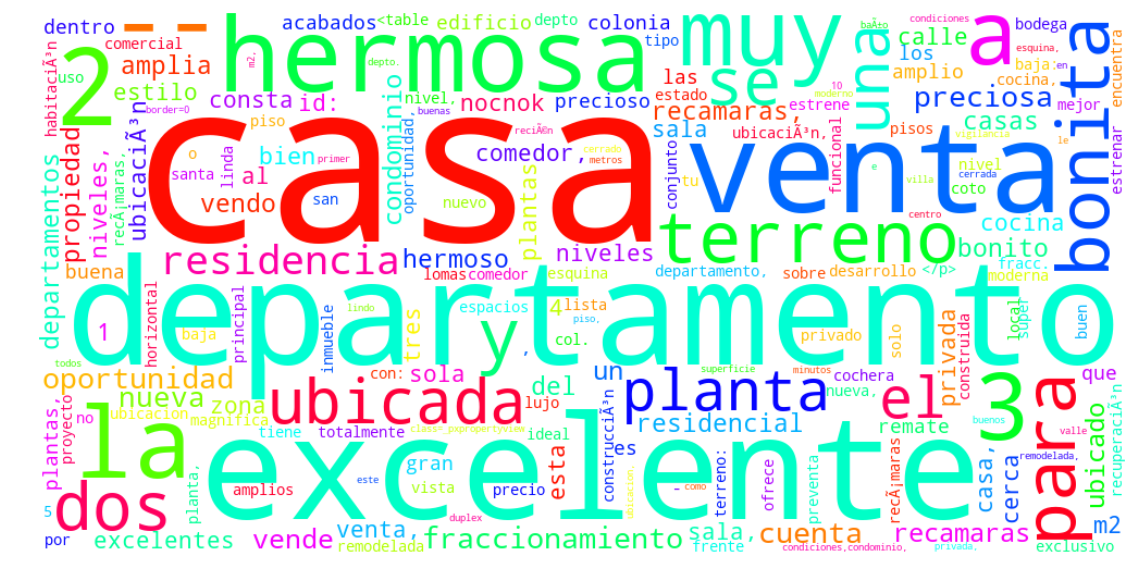

In [87]:
wordcloud= WordCloud(width=1000, height=500, colormap="hsv", background_color='white')
wordcloud.generate_from_frequencies(frequencies=words_df.word.value_counts())

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.margins(x=0, y=0)
plt.axis('off')
plt.show()